# Introduction

By now, we have developed a stronger intuition as to what spectrograms are, and how to create them. Simply put, spectrograms allow us to visualize audio and the pressure these sound waves create, thus allowing us to see the shape and form of the recorded sound.

The main aim of this article is to introduce a new flavor of spectrograms - one that is widely used in the Machine Learning space as it represents human-like perception very well.

Let's first start by importing all our necessary packages.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa
import librosa.display

# Mel Scale

Before discussing Mel Spectrograms, we first need to understand what the Mel Scale is and why it is useful. The Mel Scale is a logarithmic transformation of a signal's frequency. The core idea of this transformation is that sounds of equal distance on the Mel Scale are perceived to be of equal distance to humans. What does this mean?

For example, most human beings can easily tell the difference between a 100 Hz and 200 Hz sound. However, by that same token, we should assume that we can tell the difference between 1000 and 1100 Hz, right? Wrong.

It is actually much harder for humans to be able to differentiate between higher frequencies, and easier for lower frequencies. So, even though the distance between the two sets of sounds are the same, our perception of the distance is not. This is what makes the Mel Scale fundamental in Machine Learning applications to audio, as it mimics our own perception of sound.

The transformation from the Hertz scale to the Mel Scale is the following:


$$m = 1127 \cdot \log \left(1 + \frac{f}{700} \right) $$

Note that $\log$ in this case refers to the natural logarithm (also denoted as $\ln$.) If the logarithm were of base 10, the equation's coefficient (1127) would alter. However, in this article, we will simply refer to the equation stated above.

Let's visualize the relationship between Hertz and Mels:

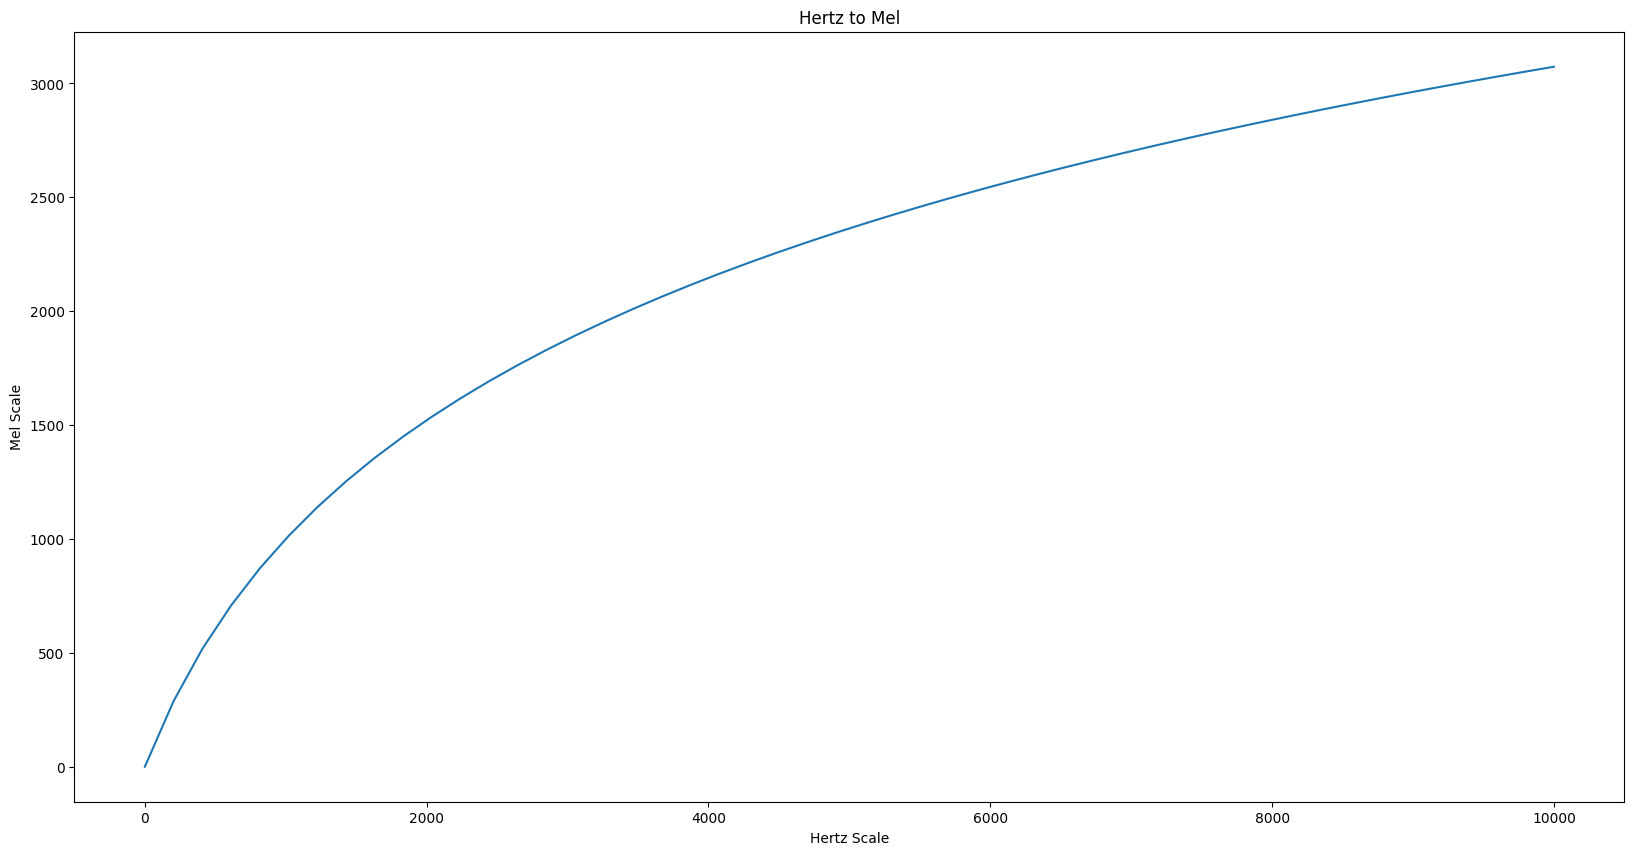

In [6]:
%matplotlib inline
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4)
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz)

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')
plt.show()

As we can see from the graph above, frequencies that are lower in Hz have a larger distance between them Mels, whereas frequencies that are higher in Hz have a smaller distance between them in Mels, reinforcing its human-like properties.

Now that we have a good understanding of the Mel Scale's utility, let's use this intuition to develop Mel Spectrograms.

# The Mel Spectrogram

Mel Spectrograms are spectrograms that visualize sounds on the Mel scale as opposed to the frequency domain, as we saw previously. Now, I know what you are thinking, is it really that simple? Yes, it is.

As soon as the intuition of spectrograms are established, it makes learning various flavors of them very easy. All that is required is the new framework in which we develop our spectrograms under. I will assume that you know the underlying properties of how this is done. Developing Mel Spectrograms are even easier than their definition.

Here's how we do it:

In [8]:
# Load in the sounds
rb, sr = librosa.load('mp3_files/M/M 4 R i - 4 N N 5 (by A Y h a z + t d e f o b j).mp3')
rap, _ = librosa.load('mp3_files/M/M31-BMS EDIT- (by CHAN).mp3')
rock, _ = librosa.load('mp3_files/M/M-A (by Musical Masterpiece).mp3')


In [10]:
print(rb)

[ 0.00156316  0.01794534 -0.00568576 ...  0.00126482  0.00106408
  0.00115354]


In [12]:
# Create Mel Spectrograms of sounds
rbSpec = librosa.feature.melspectrogram(y=rb)
rapSpec = librosa.feature.melspectrogram(y=rap)
rockSpec = librosa.feature.melspectrogram(y=rock)

# Convert amplitudes to dB
rbSpec = librosa.amplitude_to_db(rbSpec)
rapSpec = librosa.amplitude_to_db(rapSpec)
rockSpec = librosa.amplitude_to_db(rockSpec)


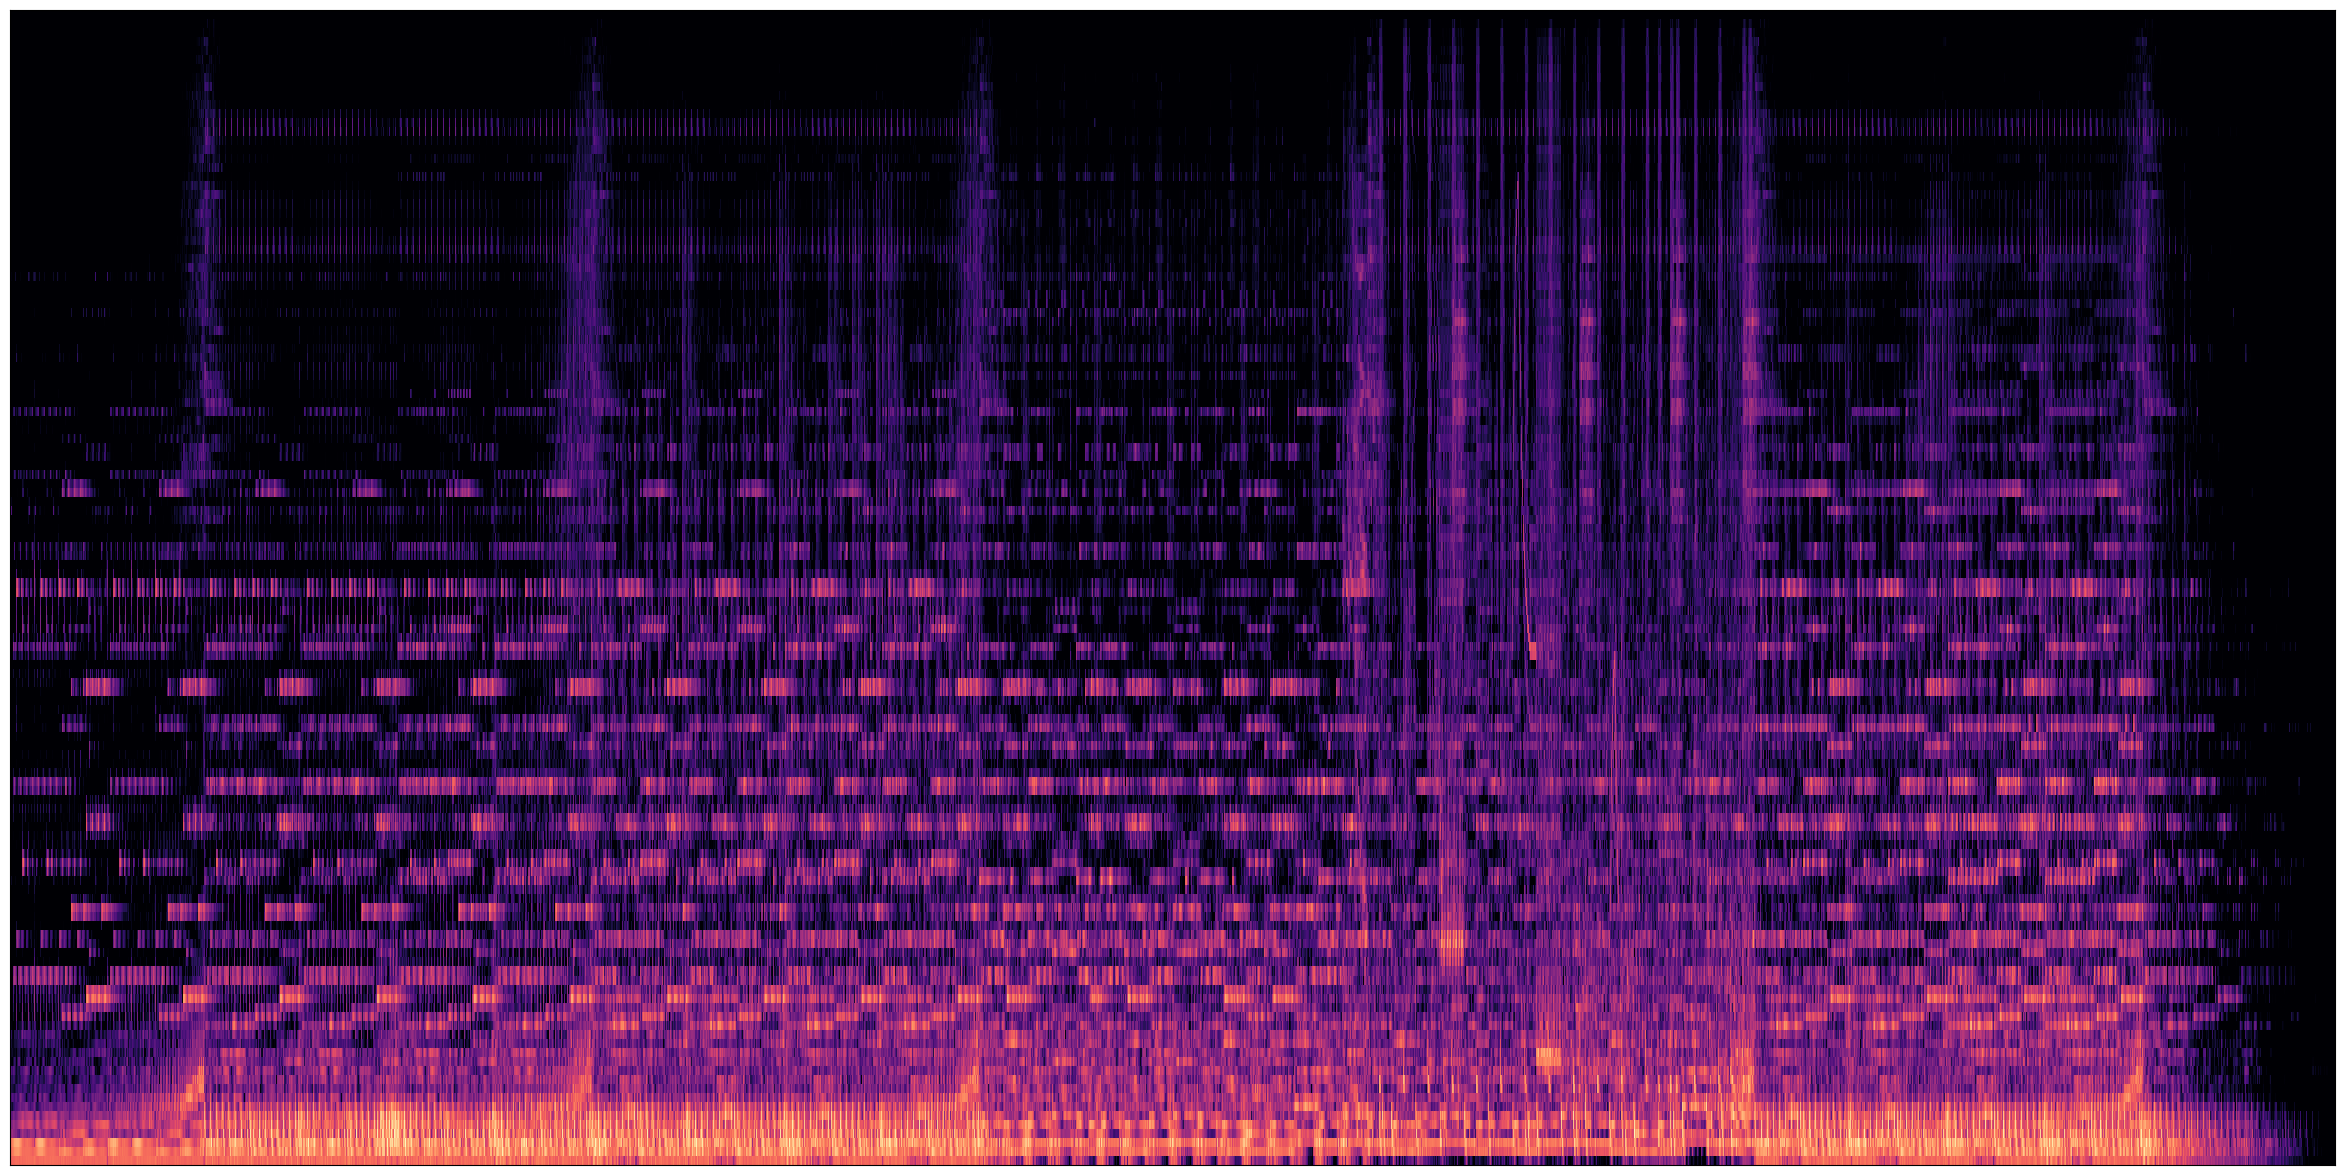

In [21]:
# Plot mel spectrograms
fig, ax = plt.subplots(1,1, figsize = (30,15))
# ax[0].set(title = 'Mel Spectrogram of R&B')
i = librosa.display.specshow(rbSpec, ax=ax, cmap = 'magma')
# plt.colorbar(i)


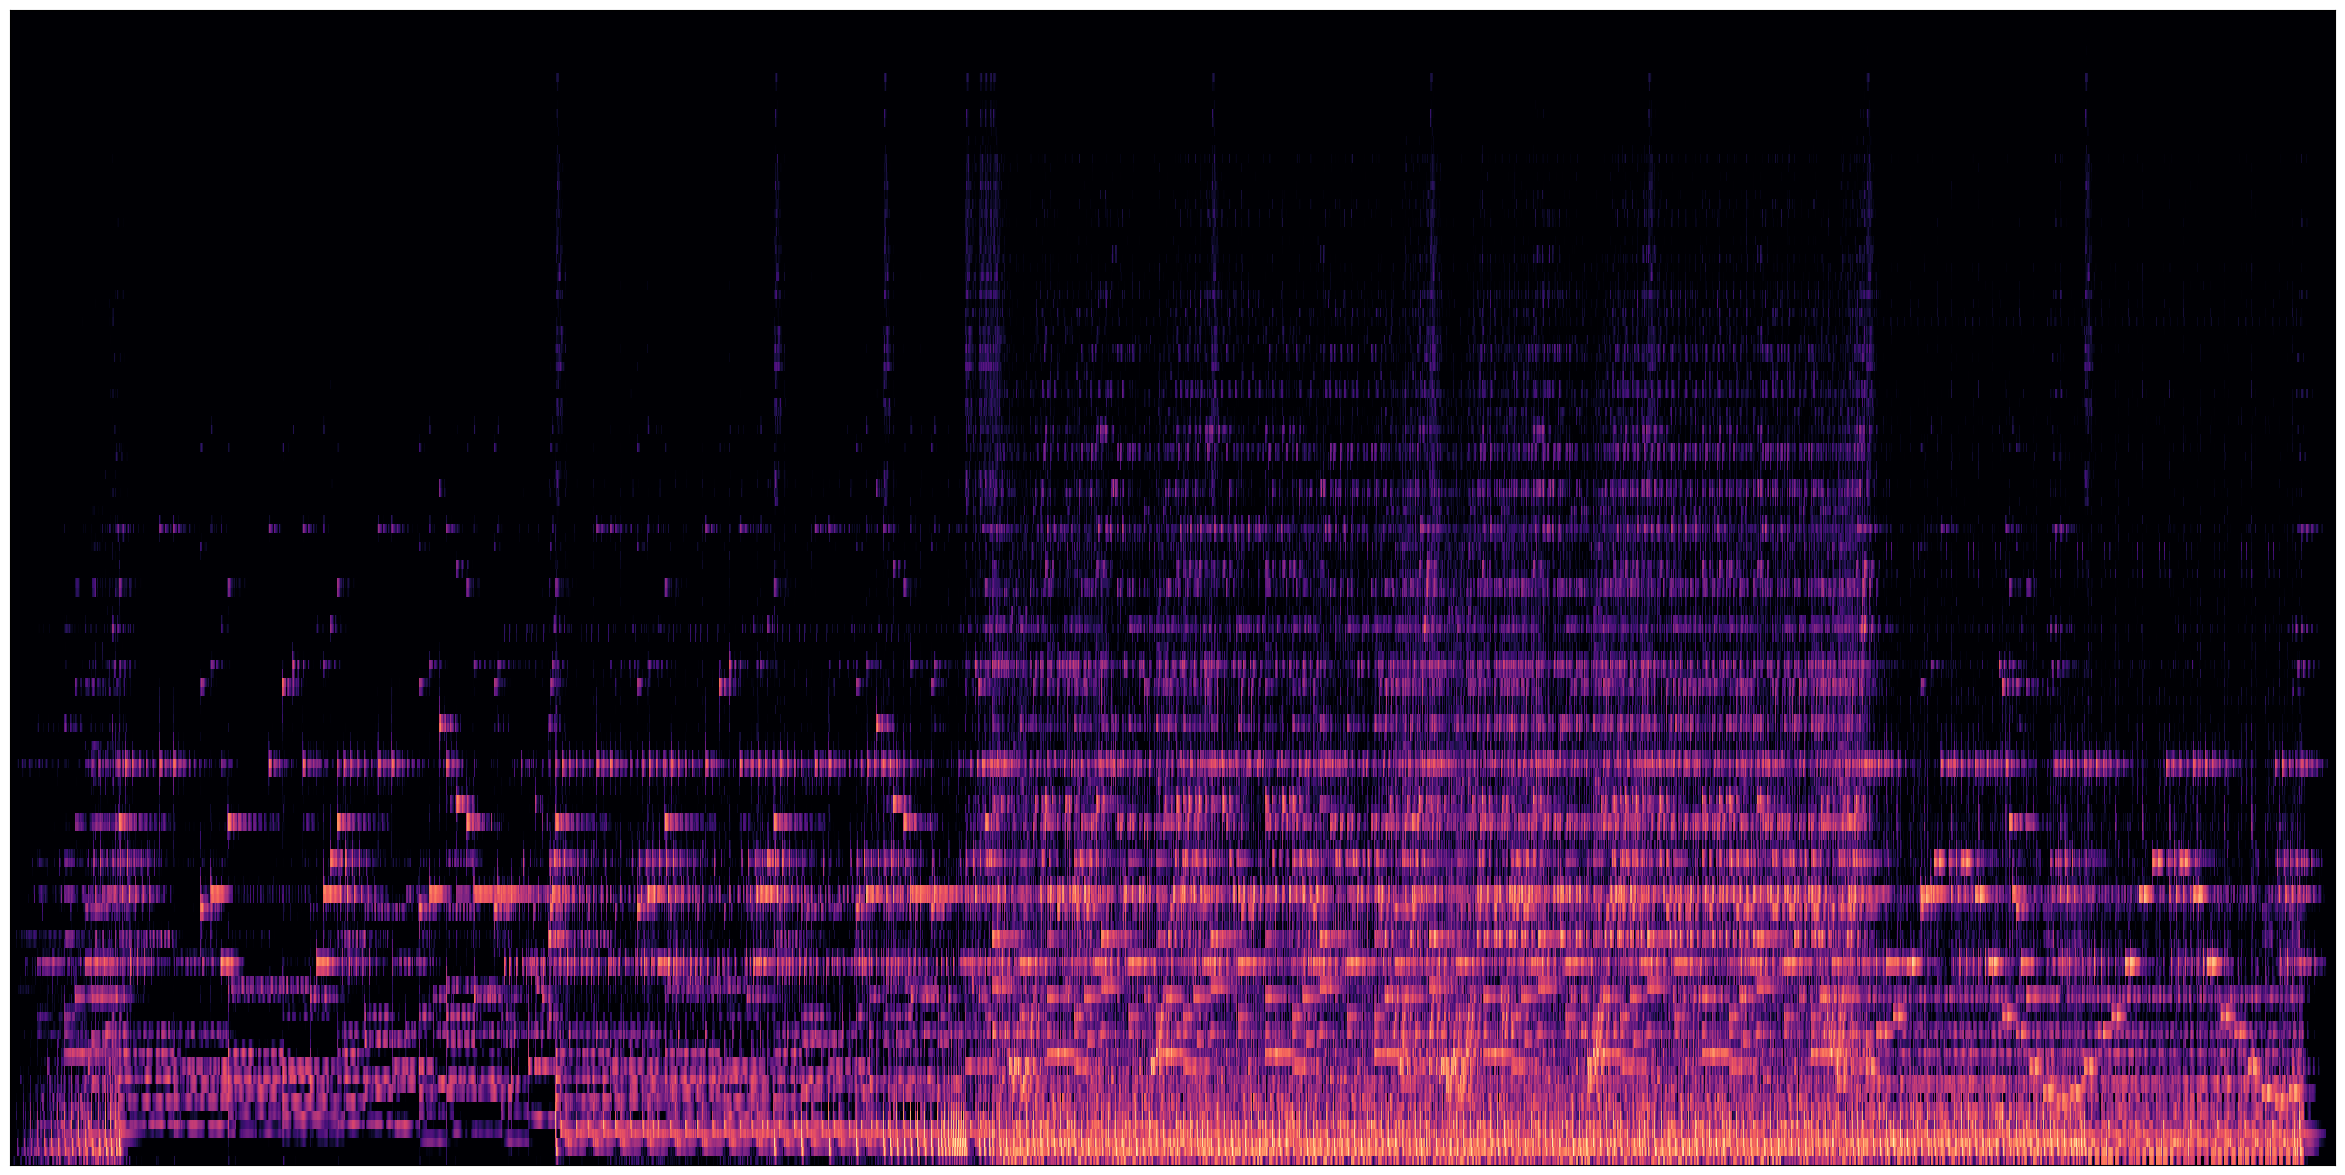

In [22]:
fig, ax = plt.subplots(1,1, figsize = (30,15))

# ax[1].set(title = 'Mel Spectrogram of Rap')
librosa.display.specshow(rapSpec, ax=ax, cmap = 'magma')

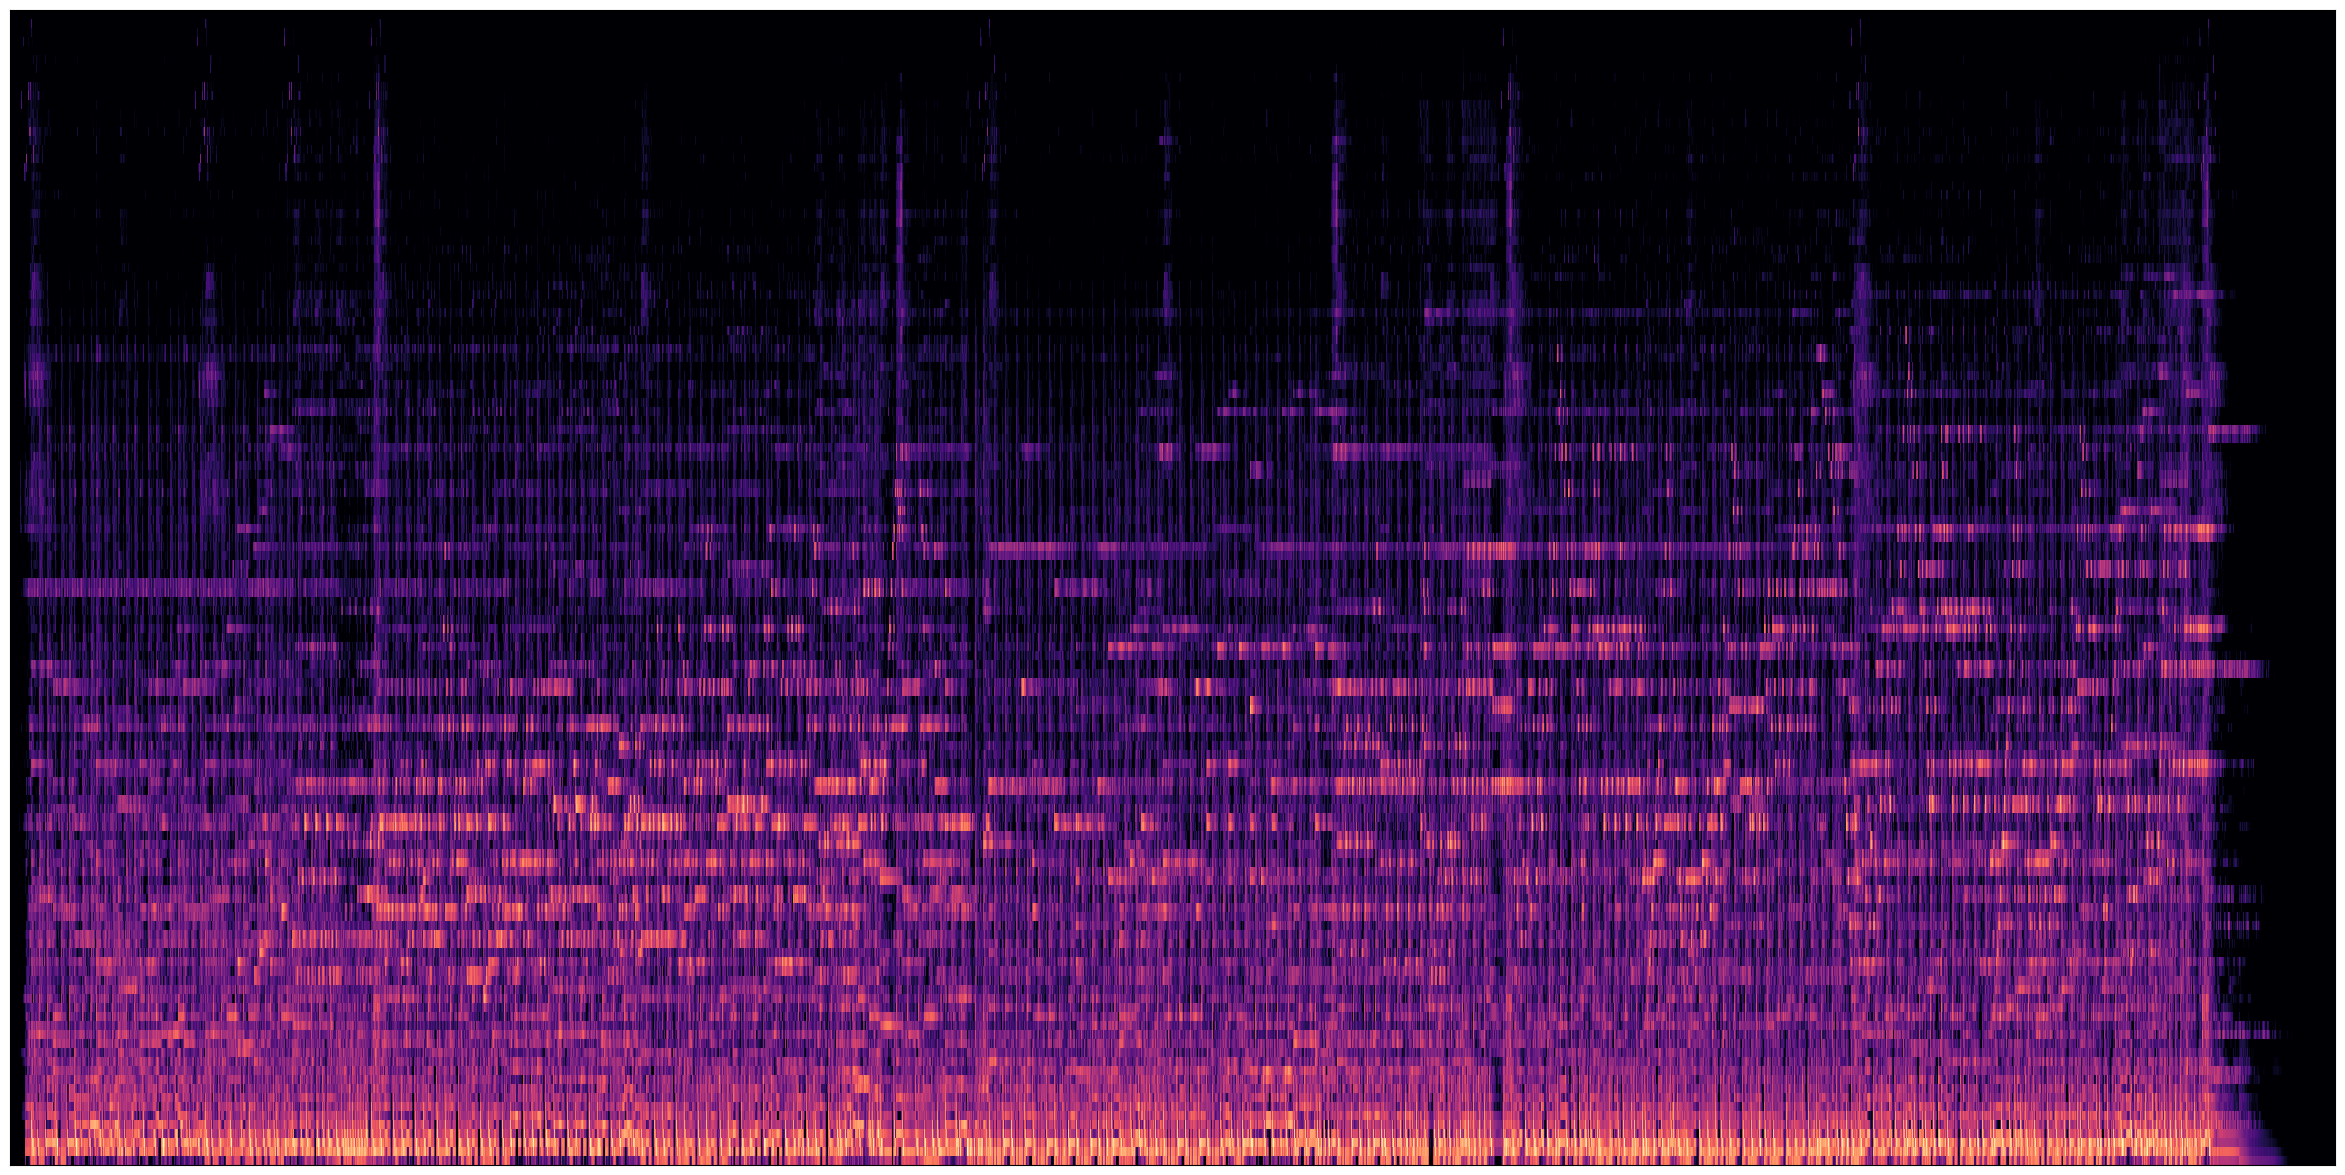

In [23]:
fig, ax = plt.subplots(1,1, figsize = (30,15))

# ax[2].set(title = 'Mel Spectrogram of Rock')
librosa.display.specshow(rockSpec, ax=ax, cmap = 'magma')

Similar to our results in spectrograms, we can see how each sound takes a unique shape based off of the sound it actually produces.

The guitar (which is longer in length than the kick and snare) resonates outwards more than the other studied sounds. Intuitively, this should make sense as when one plays the guitar, the strings that were strummed are still vibrating even after being played, which is how this resonating structure is being portrayed. The kick drum, has a quite low and immediate sound. You can think of the kick drum as a sort of thump. The snare, is quite high frequency and while slightly resonates outward (and more so upwards,) dissipates quicker than the other sounds.

# Mel Frequency Cepstral Coefficients

Mel Frequency Cepstral Coefficients (MFCCs) were originally used in various speech processing techniques, however, as the field of Music Information Retrieval (MIR) began to develop further adjunct to Machine Learning, it was found that MFCCs could represent timbre quite well.

The basic procedure to develop MFCCs is the following:

- Convert from Hertz to Mel Scale
- Take logarithm of Mel representation of audio
- Take logarithmic magnitude and use Discrete Cosine Transformation (DCT)
- This result creates a spectrum over Mel frequencies as opposed to time, thus creating MFCCs

If the ML problem warrants MFCCs to be used, such as automatic speech recognition or denoising audio, the number of coefficients used is a hyperparameter of the model. Because of this, the number of MFCCs will vary based on the problem. However, for this example, we will use `librosa`'s default 20 MFCCs. In `librosa`, we can do all of this and visualize the output in a just few lines of code:

In [27]:
# Take MFCCs of sounds:
rbMFCC = librosa.feature.mfcc(y=rb)
rapMFCC = librosa.feature.mfcc(y=rap)
rockMFCC = librosa.feature.mfcc(y=rock)


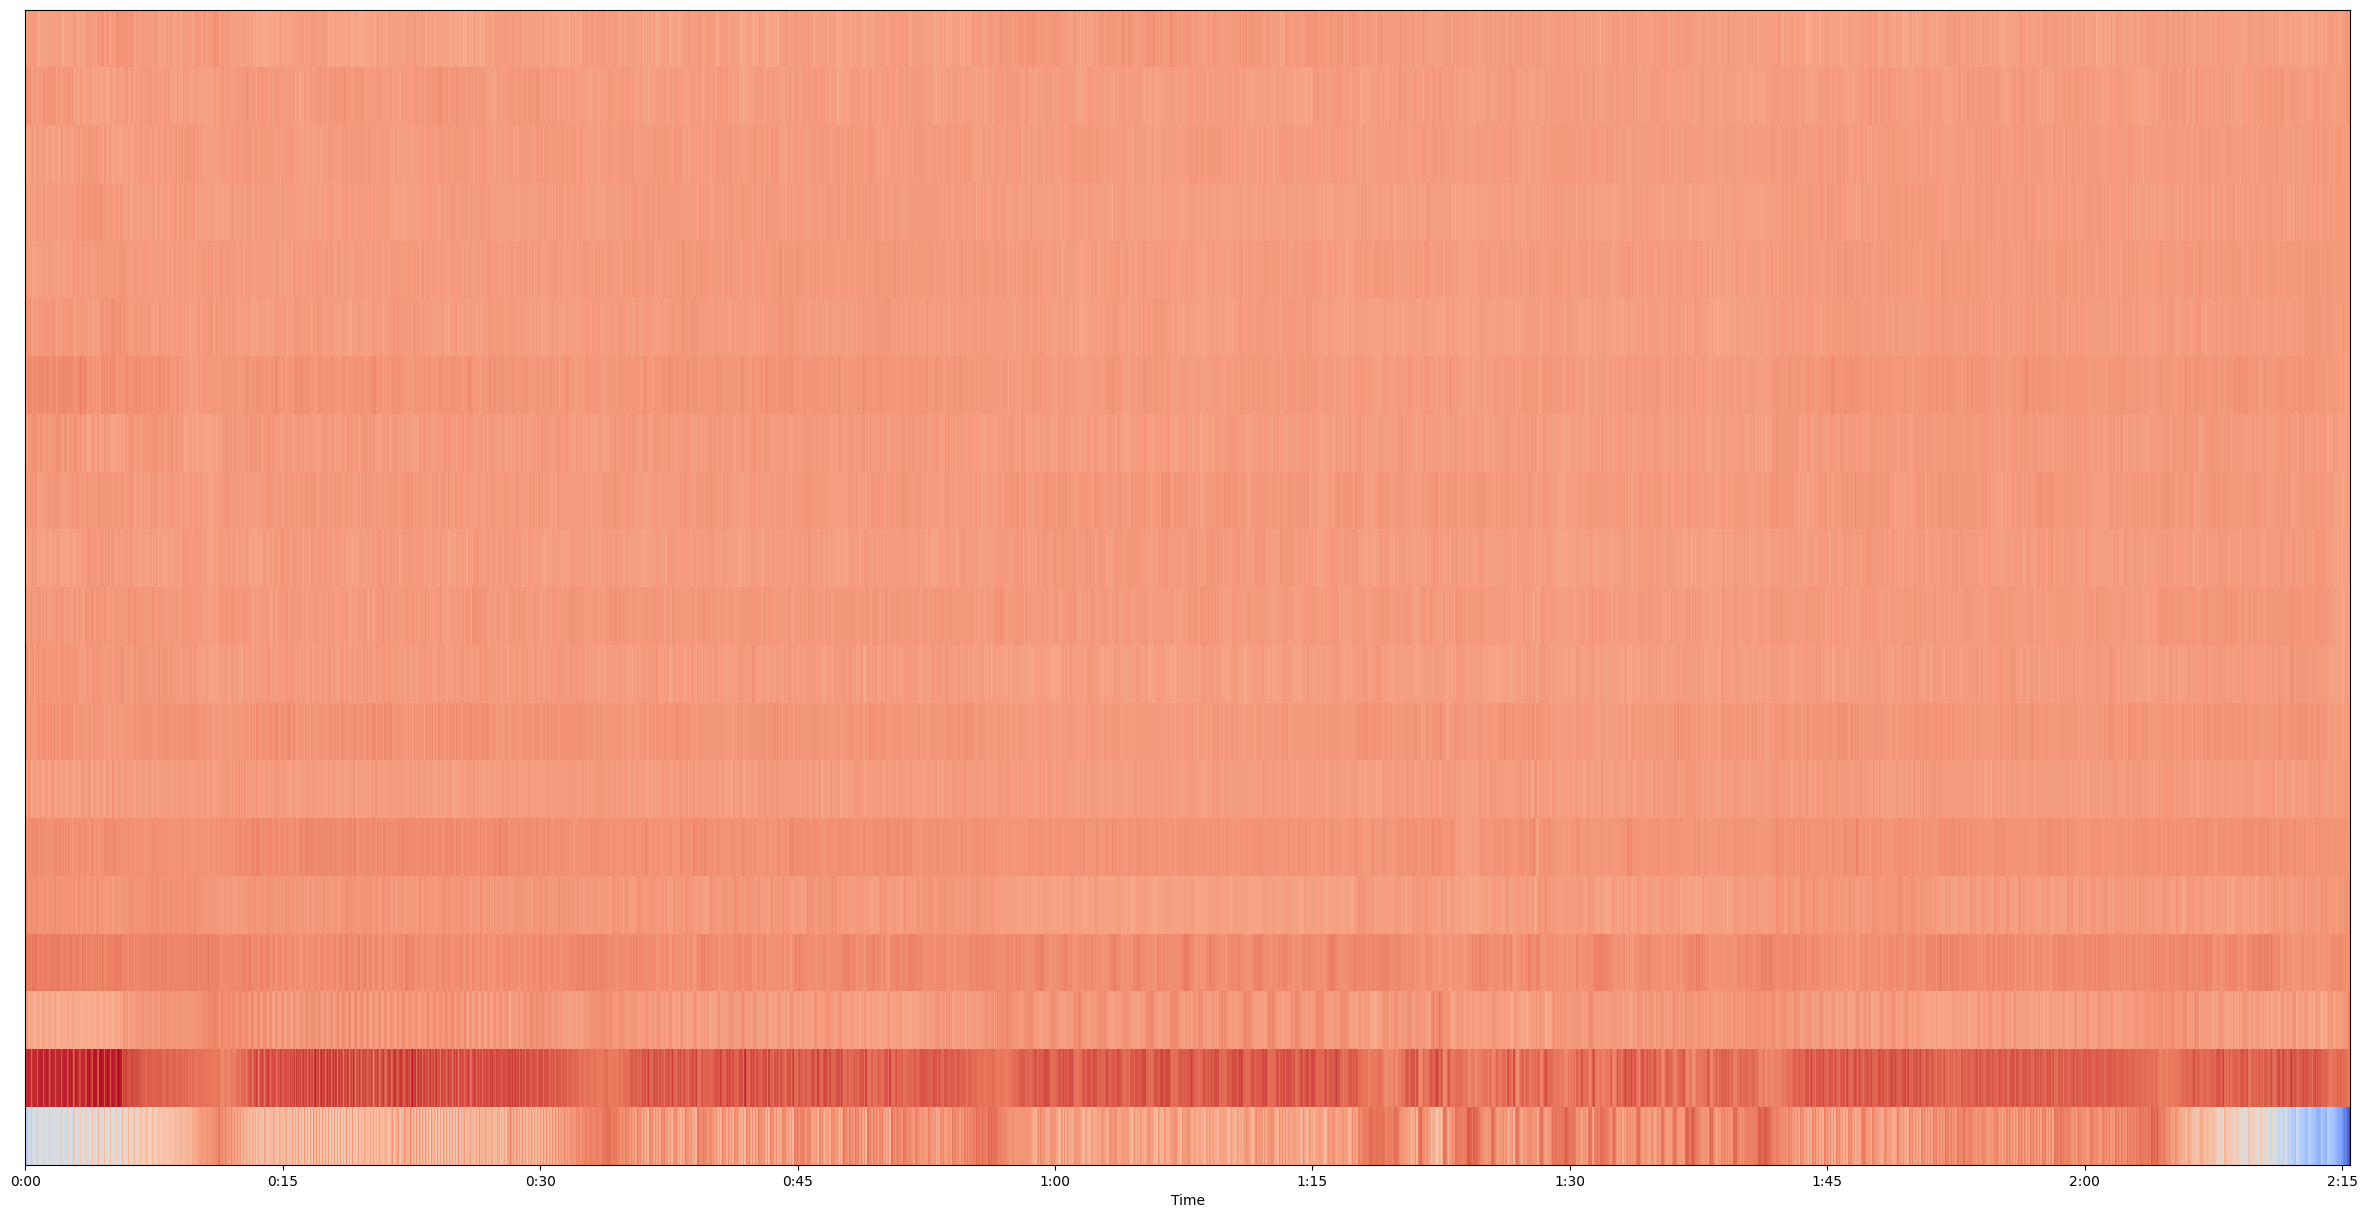

In [28]:
# Plot MFCCs
fig, ax = plt.subplots(1,1, figsize = (30,15))
# ax[0].set(title = 'MFCCs of R&B')
i = librosa.display.specshow(rbMFCC, x_axis='time', ax=ax)


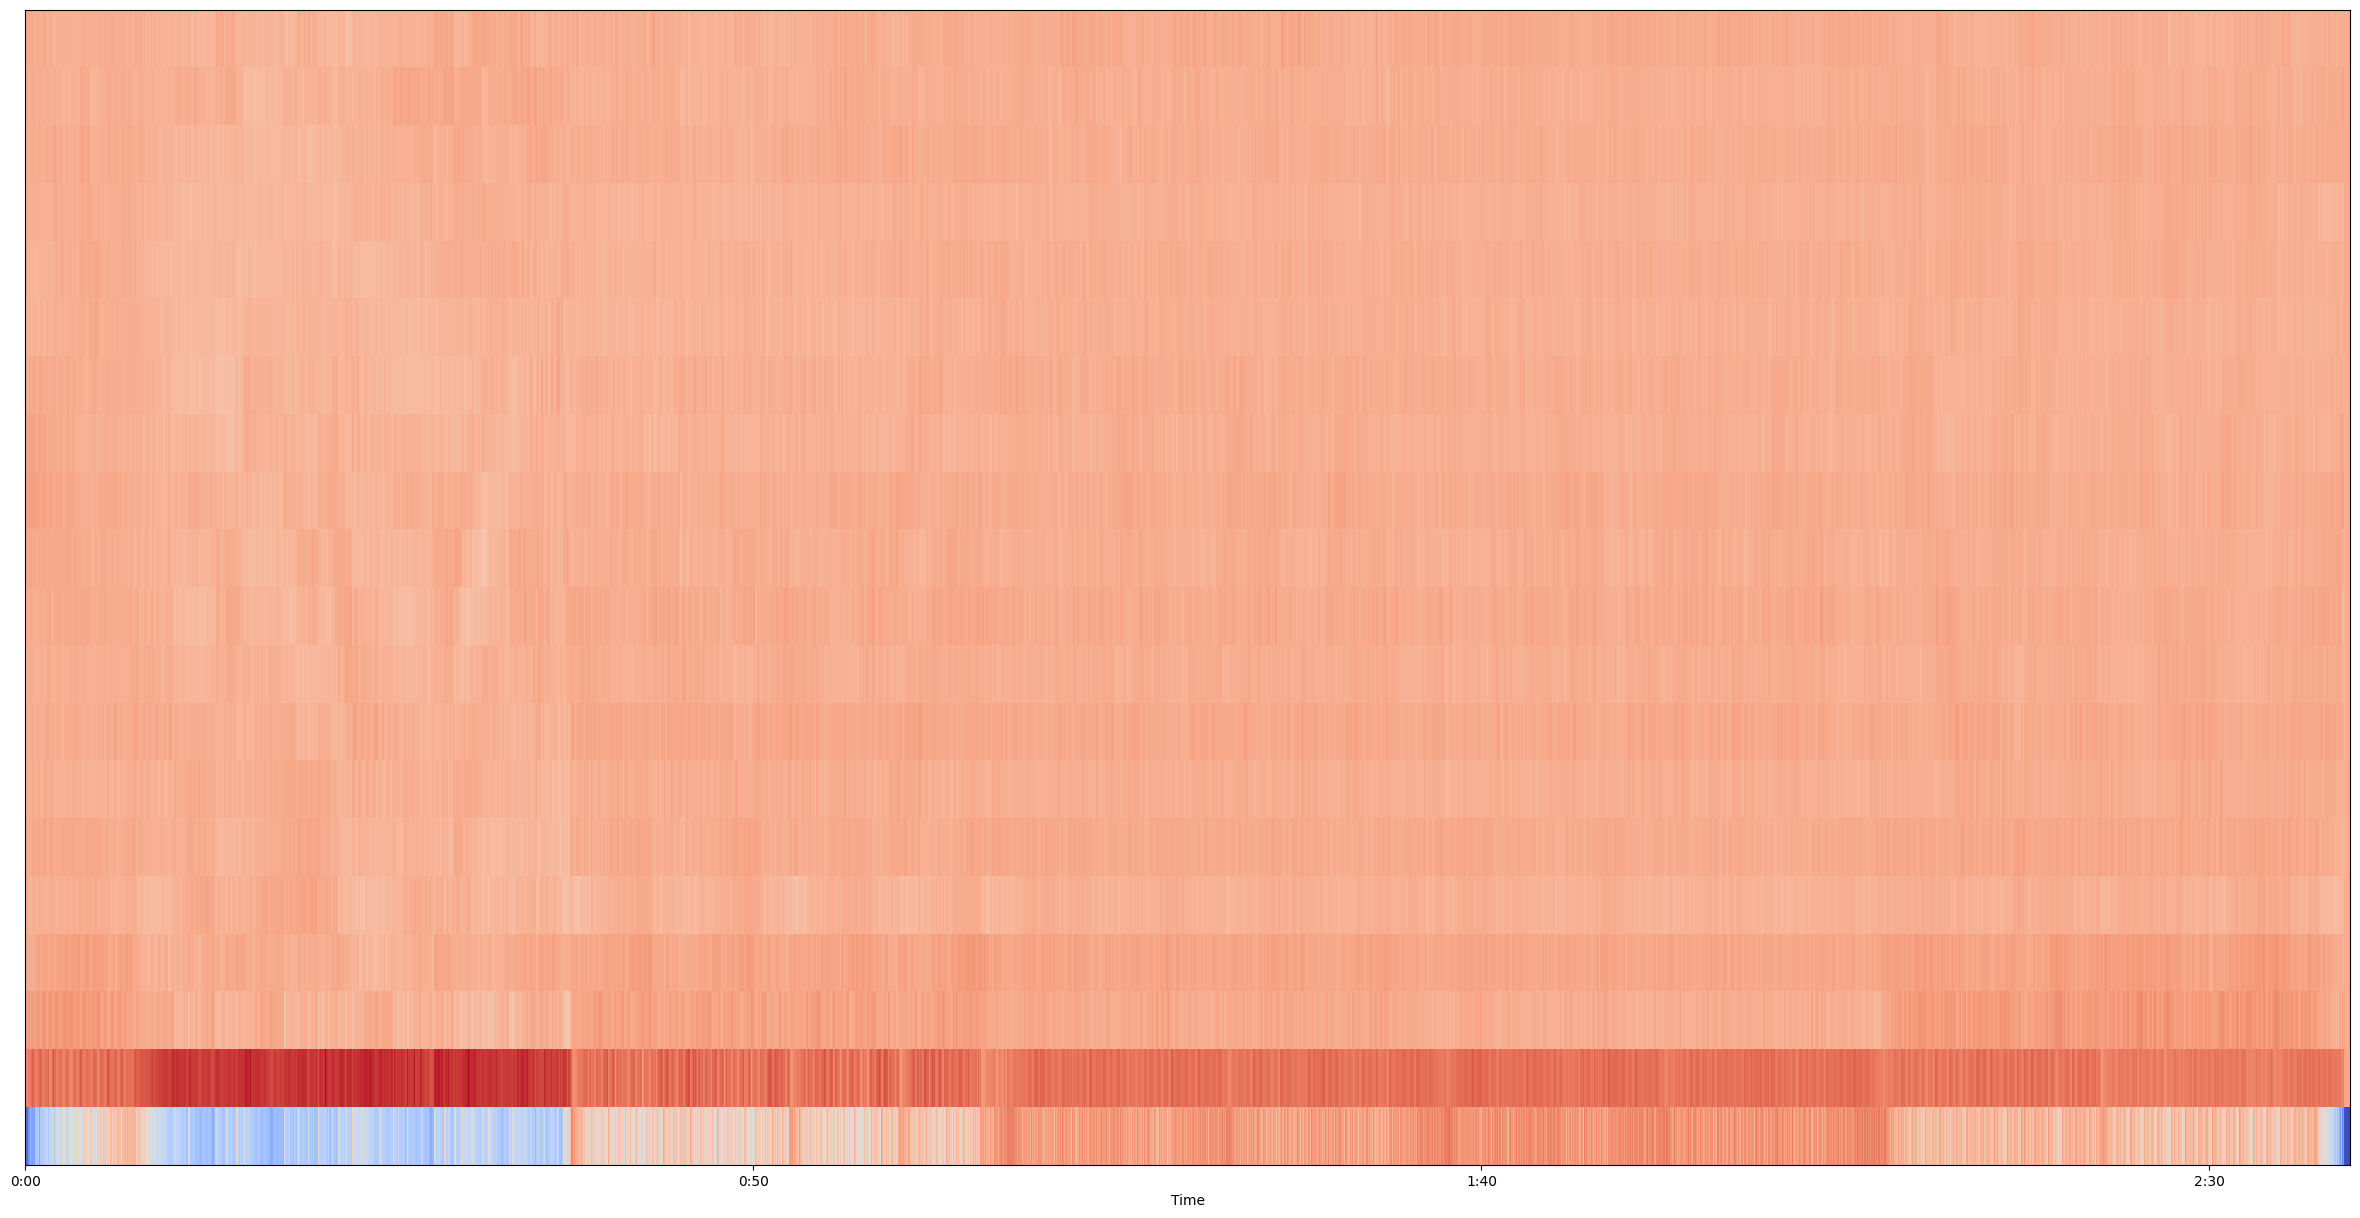

In [29]:
fig, ax = plt.subplots(1,1, figsize = (30,15))

# ax[1].set(title = 'MFCCs of Rap')
librosa.display.specshow(rapMFCC, x_axis='time', ax=ax)

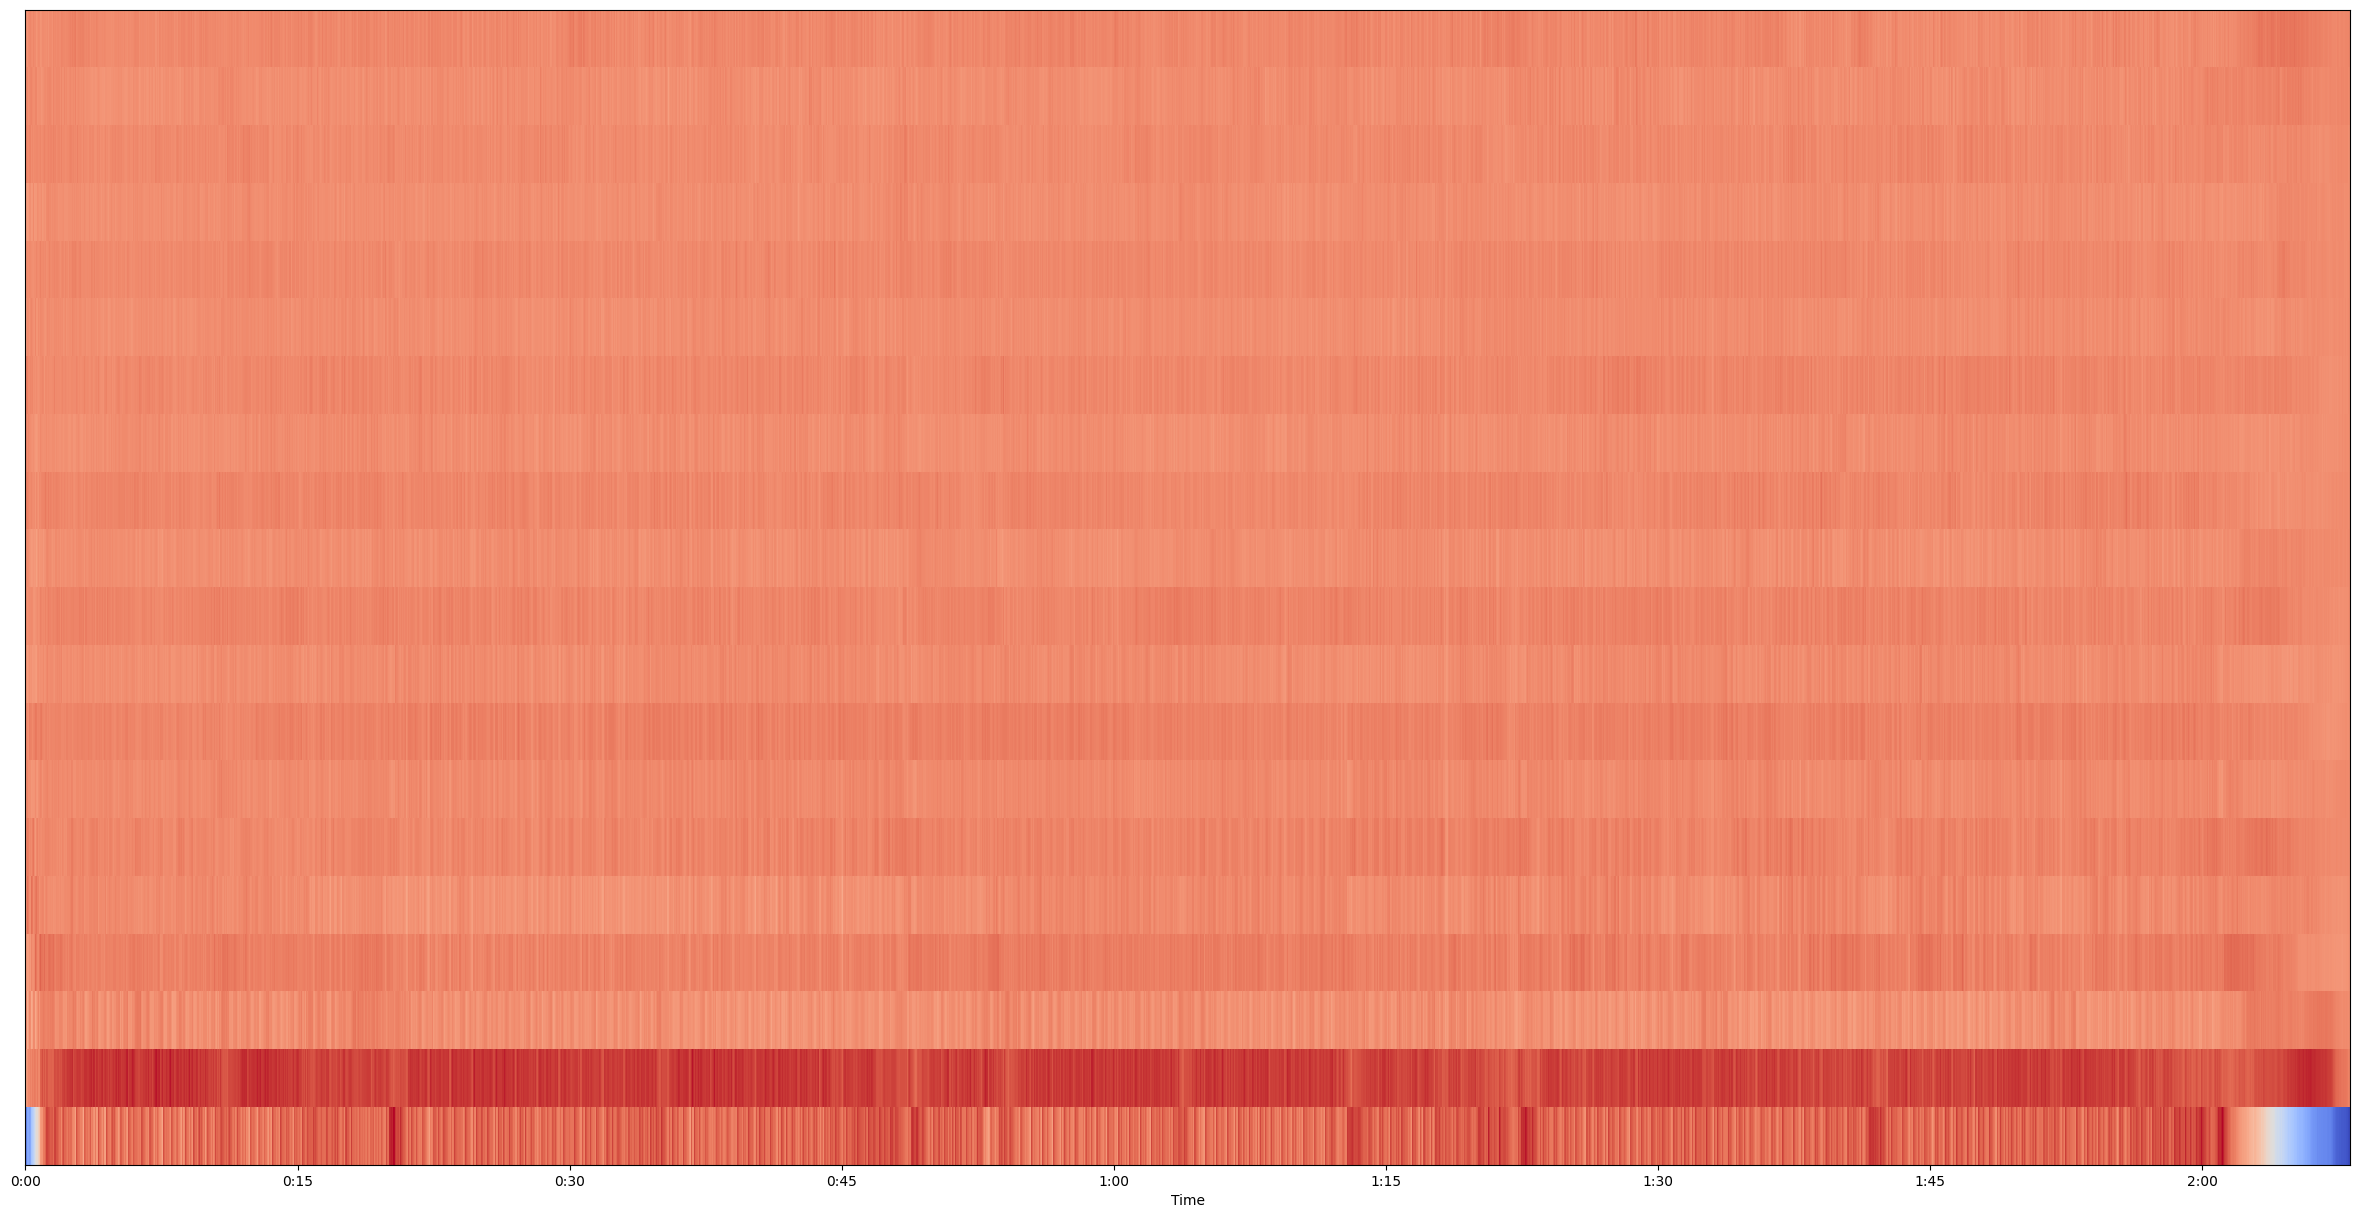

In [32]:
fig, ax = plt.subplots(1,1, figsize = (30,15))

# ax[2].set(title = 'MFCCs of Rock')
librosa.display.specshow(rockMFCC,x_axis='time', ax=ax)
# plt.colorbar(i)

# Conclusion

As a wrap-up for this article, you have now learned:

- What the Mel Scale is and how it plays a role in human-like interpretation of audio
- How to map the Mel Scale onto spectrograms
- What MFCCs are, certain use cases of MFCCs, and how to develop them

Leveraging Mel Spectrograms is a fantastic way to process audio such that various Deep Learning and Machine Learning problems can learn from the recorded sounds.

In the next article, we will dive deeper into Music Information Retrieval (MIR) using the bases we have established and attempt to gain more insight as to what makes music so unique to humans.
